In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const


Queremos plotar a função de Wigner para o estado de gato (com termo de interferência) no espaço de fase. Para tanto, utilizaremos a seguinte função:

$$ W(x,p) = \frac{1}{N^2}\frac{1}{\pi \hbar} \left\{ e^{-\frac{(x - \alpha_x)^2}{2\Delta x^2} -\frac{(p - \alpha_p)^2}{2\Delta p^2} } + e^{-\frac{(x + \alpha_x)^2}{2\Delta x^2} -\frac{(p + \alpha_p)^2}{2\Delta p^2} } + 2e^{-\frac{x^2}{2\Delta x^2} -\frac{p^2}{2\Delta p^2} }\cos\left[\frac{2}{\hbar}(x\alpha_p - p\alpha_x) \right] \right\}$$

Onde N é a constante de normalização, cuja expressão depende de $\alpha_x$ e $\alpha_p$:

$$ N = \sqrt{2\left[ 1 + e^{-\frac{1}{8}\left(\frac{\alpha_x^2}{\Delta x^2} + \frac{\alpha_p^2}{\Delta p^2}\right)} \right]} $$

Vamos determinar nossas quantidades e plotar a função de Wigner para um estado $\ket{\alpha}$ genérico:

In [50]:
alphax = 4
alphap = 4


m = 1 #const.m_e.to_value()
omega = 1
h = 1 #const.hbar.to_value()
deltax = np.sqrt(h/(2*m*omega))
deltap = np.sqrt(h*m*omega/2)

def N(ax, ap):
    dentro = 1 + np.exp(-1/8 * (ax**2/(deltax**2) + ap**2/deltap**2))
    fora = np.sqrt(2*dentro)
    return fora

def wigner(ax, ap, x, p):
    constantes = N(ax,ap)**2 * np.pi * h
    conteudo = np.exp(-(x - ax)**2/(2*deltax**2) - (p - ap)**2/(2*deltap**2))
    return conteudo/constantes

x = np.linspace(-10,10,100)
p = np.linspace(-10,10,100)
X, P = np.meshgrid(x,p)





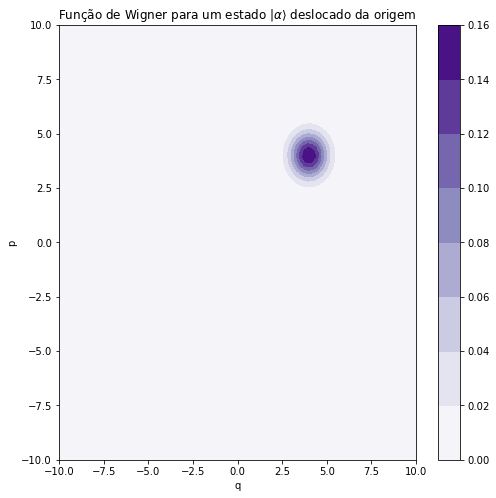

In [51]:
plt.figure(figsize=(8,8))
plt.contourf(X, P, wigner(alphax, alphap, X, P), cmap='Purples')
plt.xlabel("q")
plt.ylabel("p")
plt.title(r"Função de Wigner para um estado $\left| \alpha \right\rangle$ deslocado da origem")
plt.colorbar()
plt.show()

Agora vamos para o estado de gato sem interferência:

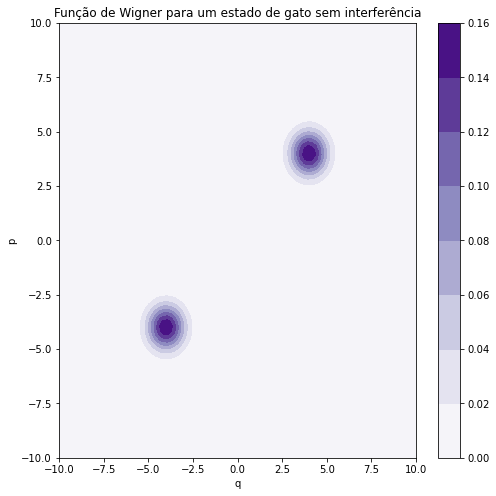

In [52]:
plt.figure(figsize=(8,8))
plt.contourf(X, P, wigner(alphax, alphap, X, P) + wigner(-alphax, -alphap, X, P), cmap='Purples')
plt.xlabel("q")
plt.ylabel("p")
plt.title(r"Função de Wigner para um estado de gato sem interferência")
plt.colorbar()
plt.show()

Por fim, vamos para o estado de gato com o termo de interferência:

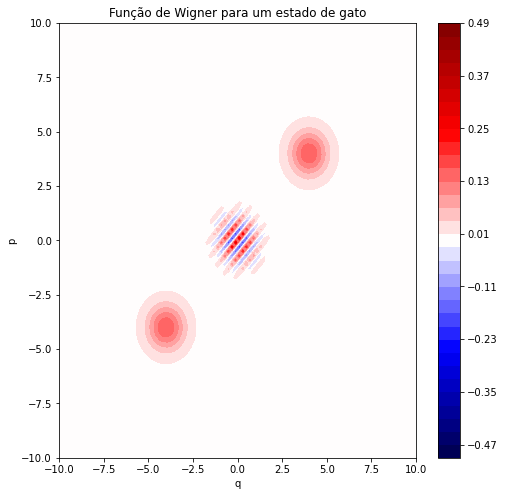

In [53]:
def Wignergato(ax, ap, x, p):
    wignermais = wigner(ax, ap, x, p)
    wignermenos = wigner(-ax, -ap, x, p)
    constantes = N(ax,ap)**2 * np.pi * h
    conteudo = 2* np.exp(-(x)**2/(2*deltax**2) - (p)**2/(2*deltap**2))
    interferencia = np.cos(2/h * (x*ap - p*ax))
    final = conteudo*interferencia/constantes + wignermais + wignermenos   
    return final

nivel = np.arange(-0.5,0.5,0.03)
plt.figure(figsize=(8,8))
plt.contourf(X, P, Wignergato(alphax, alphap, X, P), levels = nivel, cmap='seismic')# [-0.33, -0.29, -0.25, -0.21, -0.17, -0.13,
#-0.09, -0.05, -0.01, 0.01, 0.05, 0.09, 0.13, 0.17, 0.21, 0.25, 0.29, 0.33], cmap='magma')
plt.xlabel("q")
plt.ylabel("p")
plt.title(r"Função de Wigner para um estado de gato")
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Função de Wigner para um estado de gato')

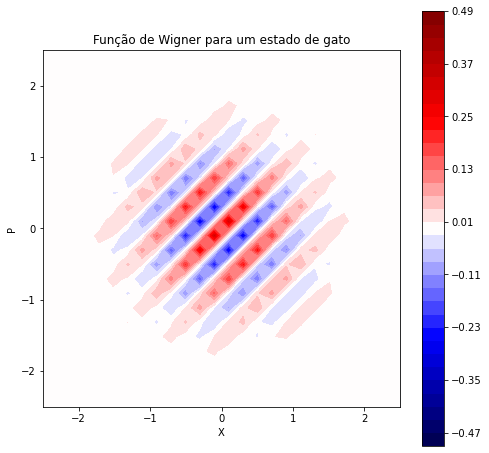

In [54]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(-2.5,2.5)#x[0], x[-1])
ax.set_ylim(-2.5,2.5)#p[0], p[-1])
cfset = ax.contourf(X, P, Wignergato(alphax, alphap, X, P), levels = nivel, cmap ='seismic') #levels = [-0.33, -0.29, -0.25, -0.21, -0.17, -0.13,
#-0.09, -0.05, -0.01, 0.01, 0.05, 0.09, 0.13, 0.17, 0.21, 0.25, 0.29, 0.33], cmap='magma') #coolwarm
ax.imshow(np.rot90(Wignergato(alphax, alphap, X, P)), cmap='coolwarm', extent=[x[0], x[-1], p[0], p[-1]])
#cset = ax.contour(X, P, Wignergato(alphax, alphap, X, P), levels = [-0.33, -0.29, -0.25, -0.21, -0.17, -0.13,
#-0.09, -0.05, -0.01, 0.01, 0.05, 0.09, 0.13, 0.17, 0.21, 0.25, 0.29, 0.33], colors='k')
#ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('P')
fig.colorbar(cfset)
plt.title("Função de Wigner para um estado de gato")

Esse segundo gráfico foi baseado em: https://towardsdatascience.com/simple-example-of-2d-density-plots-in-python-83b83b934f67.